## HOMEWORK3

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [3]:
img = cv2.imread('coin.jpg',0)
blur = cv2.GaussianBlur(img,(15,15),0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

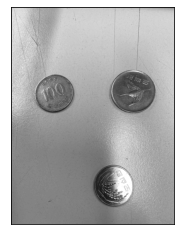

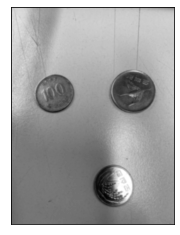

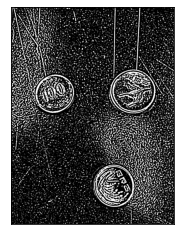

In [4]:
pltImage(img)
pltImage(blur)
pltImage(thresh)